# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum() #подсчитаем кол-во пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique() #узнаем кол-во уникальных значений в столбе children

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()
#isna().sum() позволяют узнать кол-во оставшихся пропусков (аналогично заданию 4)

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)
# в метод astype передаем целочисленный тип данных за который отвечает int

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()
#str.lower() используем для перевода в нижний регистр для Series
#если бы применяли к DataFrame исполизоували бы lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()
#считает количество дубликатов с помощью duplicated().sum()

71

In [17]:
data = data.drop_duplicates()
#найденное кол-во дубликтов удаляесм с помощью команды data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

### Для работы с полученными данными нам необходимо обратиться к DataFrame,к столбцам 'children' 'debt' 

In [23]:
#просмотрим еще раз таблицу головы
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [24]:
# и с хвоста 
data.tail()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем
21524,2,1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047,на покупку автомобиля,C,операции с автомобилем


"на первый взгляд в столбцах отсутствуют пропуски(мы их удаляли выше), но считаю, что необходима перепроверка 
для этого применим .isnull().sum() к столбцу children"

In [25]:
#проверим пропуски в сторбце children
data['children'].isnull().sum()

0

In [26]:
#а тут проверим пропуски в столбце debt
data['debt'].isnull().sum()

0

In [27]:
#проверим отсутствие отрицательных значений в столбцах
#все отрицательные значения - это значения в столбцах  меньше 0  
data_neg = data[data['children'] < 0]
print(data_neg)
data_neg_debt = data[data['debt'] < 0]
display(data_neg_debt)

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose, total_income_category, purpose_category]
Index: []


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category


**Как мы видим в столбцах отсутствуют отрицательные значения**



In [28]:
#опсчитаем кол-во задолжностей для сгруппированного столбца children
data_groupby = data.groupby('children')['debt'].sum() 
data.groupby('children')['debt'].count()

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: debt, dtype: int64

In [29]:
#посчитаем средее % соотношение
#для этого сгруппируем значения по столбцу и посчитаем среднее количество по кредиту
data_value = data.groupby('children')['debt'].mean()*100
print(data_value)

children
0    7.543822
1    9.234609
2    9.454191
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64


в данных подсчетах прослеживается следующая логика:
те, у кого 5 детей почти не имею просрочки по кредитам, значит они ответственно относятся к выплатам
интересен факт, что семьи без детей нарушают выплаты +- как и семьи с 3 детьми
максимальная(max) просрочка по кредитам у семей с 4 детьми
минимальная(min) у семей с 3 детьми
p.s. max $ min взяты для сравнения из выборки семей с детьми т.е. от 1-5

#### Попробуем решить через категоризацию

#### def family_status_children(row):
    if row == 0:
        return 'нет детей'
    elif row <= 3:
        return '1-2 ребенка(малодетная семья)'
    else:
        return 'многодетная семья'
    
data['family_status_children'] = data['children'].apply(family_status_children)
data['family_status_children'].value_counts()

схходится с данными моего предыдущего расчета(по сводной таблице) ==> ниже


Но данные принято демонстрировать(визуализировать), поэтому у нас есть 2 варианта:
1. Составить отдельную таблицу(pivot) для полученных данных;
2. Построить график

In [30]:
data_children_pivot = data.pivot_table(index = ['children'], \
                                columns = ['debt'], \
                                values = 'purpose', aggfunc='count')

data_children_pivot['%'] = data_children_pivot[1] / (data_children_pivot[0]+data_children_pivot[1])*100
data_children_pivot


debt,0,1,%
children,,,
0,13028.0,1063.0,7.543822
1,4364.0,444.0,9.234609
2,1858.0,194.0,9.454191
3,303.0,27.0,8.181818
4,37.0,4.0,9.756098
5,9.0,NaN,NaN


<AxesSubplot:ylabel='children'>

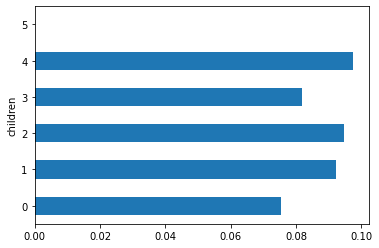

In [31]:

data.groupby('children')['debt'].mean().plot.barh()

**Вывод:** 
Бездетные ***берут кредитов больше и отдают их лучше***

семьи у которых 5 детей погасили все взятые кредиты




#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [32]:
data.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [33]:
data['family_status'].isnull().sum()
#debt проверять не будем т.к. проверку выполняли на прошлом этапе и знаем, что пропусков нет

0

In [34]:
#будем продолжать работать со сводными таблицами
#Немного теории из теории:
#Аргументы метода:
#index — столбец или столбцы, по которым группируют данные (название товара)
#columns — столбец, по значениям которого происходит группировка (даты)
#values — значения, по которым мы хотим увидеть сводную таблицу (количество проданного товара)
#aggfunc — функция, применяемая к значениям (сумма товаров)

#группируем по столбцу family_status, со значением столбца debt, values - пол, к aggfunc применим count

data_pivot_table_family = data.pivot_table(index = ['family_status'], columns = 'debt', values = 'gender', aggfunc = 'count')
display(data_pivot_table_family)


debt,0,1
family_status,,
Не женат / не замужем,2523,273
в разводе,1105,84
вдовец / вдова,888,63
гражданский брак,3749,385
женат / замужем,11334,927


Для красивой 'картинки' считаю, что не хватает столбца с отношением 0/1
для этого добавим новый столбец с именем '%' и поиграем округлением, как в прошлом задании, но тут возможно округление будет критично и будет влиять на рейтинг, проверим 

In [35]:
data_pivot_table_family['%'] = data_pivot_table_family[1]/ (data_pivot_table_family[0]+data_pivot_table_family[1])*100
data_pivot_table_family.sort_values('%')

debt,0,1,%
family_status,,,
вдовец / вдова,888,63,6.624606
в разводе,1105,84,7.064760
женат / замужем,11334,927,7.560558
гражданский брак,3749,385,9.313014
Не женат / не замужем,2523,273,9.763948


<AxesSubplot:xlabel='family_status'>

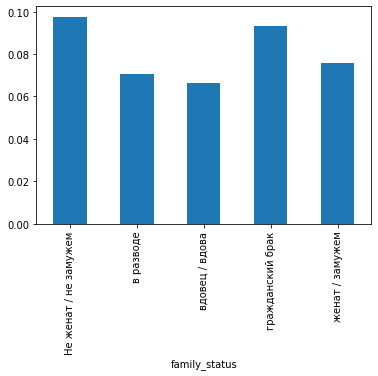

In [36]:
data.groupby('family_status')['debt'].mean().plot.bar()

**Вывод:** 
Как я и предполагал округлять до целого и тут не надо, иначе в столбце % по строкам
в разводе
женат / замужем
значения бы получились одинаковые
Исходя из полученных данных видим, что большинство строк в столбце family_status можно сгруппировать. И так пары  в статусе гражданский брак,в разводе,вдовец / вдова можно отнести к категории 'хотя бы раз женаты/замужем', в свою очередь они показывают лучшую динамику по соблюдению сроков выплат кредита

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [37]:
# прдолжим решать задачи с помощь сводных таблиц
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [38]:
data['total_income'].isnull().sum()

0

In [39]:
data['total_income_category'].isnull().sum()

0

In [40]:
data['total_income'].sort_values()

14585      20667
13006      21205
16174      21367
1598       21695
14276      21895
          ...   
17178    1711309
20809    1715018
9169     1726276
19606    2200852
12412    2265604
Name: total_income, Length: 21331, dtype: int64

In [41]:
# видим, что в таблице есть столбец 'total_income' отвечаающий за сумму дохода, а также мы категоризировали уровень дохода в 16 задании 1 части
# за это отвечает столбец 'total_income_category'
#0–30000 — 'E';
#30001–50000 — 'D';
#50001–200000 — 'C';
#200001–1000000 — 'B';
#1000001 и выше — 'A'.


data_pivot_table_income = data.pivot_table(index = ['total_income_category'], columns = 'debt', values = 'gender', aggfunc = 'count')
print(data_pivot_table_income)



debt                       0     1
total_income_category             
A                         23     2
B                       4660   354
C                      14568  1353
D                        328    21
E                         20     2


In [42]:
data_pivot_table_income['%'] = data_pivot_table_income[1]/ data_pivot_table_income[0]*100
data_pivot_table_income.sort_values('%')

debt,0,1,%
total_income_category,,,
D,328,21,6.402439
B,4660,354,7.596567
A,23,2,8.695652
C,14568,1353,9.287479
E,20,2,10.000000


<AxesSubplot:ylabel='total_income_category'>

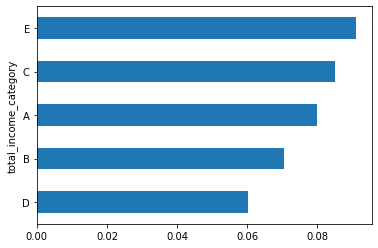

In [43]:
data.groupby('total_income_category')['debt'].mean().sort_values().plot.barh()

**Вывод:** 
можно увидеть, что высокий доход позволяет платить по кредиту во время
однако, удивительно то, что категории Е и D c небольшим доходом также выплачивают кредит без задержек
возможно, данный факт связан с распределением бюджета

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [44]:
data['purpose'].isnull().sum()

0

In [45]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [46]:
data_pivot_table_purpose = data.pivot_table(index = ['purpose'], columns = 'debt', values = 'gender', aggfunc = 'count')
print(data_pivot_table_purpose)



debt                                      0   1
purpose                                        
автомобили                              432  44
автомобиль                              450  41
высшее образование                      406  40
дополнительное образование              417  38
жилье                                   595  46
заняться высшим образованием            453  43
заняться образованием                   369  39
на покупку автомобиля                   425  44
на покупку подержанного автомобиля      436  35
на покупку своего автомобиля            458  46
на проведение свадьбы                   702  61
недвижимость                            589  42
образование                             410  32
операции с жильем                       599  48
операции с коммерческой недвижимостью   593  52
операции с недвижимостью                617  55
операции со своей недвижимостью         573  50
покупка жилой недвижимости              561  41
покупка жилья                           

In [47]:
data_pivot_table_purpose['%'] = data_pivot_table_purpose[1]/ data_pivot_table_purpose[0]*100
data_pivot_table_purpose.sort_values('%', ascending = True)

debt,0,1,%
purpose,,,
покупка своего жилья,585,34,5.811966
ремонт жилью,569,35,6.151142
строительство собственной недвижимости,587,41,6.984668
недвижимость,589,42,7.130730
покупка жилой недвижимости,561,41,7.308378
покупка недвижимости,573,43,7.504363
покупка коммерческой недвижимости,612,46,7.516340
покупка жилья для семьи,592,45,7.601351
жилье,595,46,7.731092


Но тут мы сталкиваемся со следующей проблемой, что категории кредита повторяются и дать точную оценку и заключение на основании
данной сводной таблицы невезможно.
Попробуем применить лемматизацию
Для этого объявим функцию

In [48]:
def purpose_category(purpose):
    if 'образ' in purpose:
             return 'Образование'
    if 'авто' in purpose:
             return 'Автомобиль'
    if 'свадь' in purpose:
             return 'Свадьба'
    if 'жиль' or 'недв' in purpose:
             return 'Недвижимость'
    return 'Иные цели'

data['purpose_category'] = data['purpose'].apply(purpose_category)



In [49]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,Недвижимость
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,Автомобиль
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,Недвижимость
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,Образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,Свадьба


In [50]:
purpose_category = data.groupby('purpose_category')['debt'].sum()  / \
    data.groupby('purpose_category')['debt'].count() * 100
display(purpose_category)

purpose_category
Автомобиль      9.347978
Недвижимость    7.255139
Образование     9.252758
Свадьба         7.911803
Name: debt, dtype: float64

In [51]:
purpose_category.sort_values()

purpose_category
Недвижимость    7.255139
Свадьба         7.911803
Образование     9.252758
Автомобиль      9.347978
Name: debt, dtype: float64

<AxesSubplot:ylabel='purpose_category'>

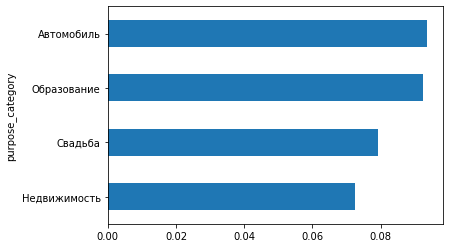

In [52]:
data.groupby('purpose_category')['debt'].mean().sort_values().plot.barh()


**Вывод:** 
результат анализа поделился на 2 части почти в равном соотношении
со стороны банка безопаснее выдавать кредиты на свадьбу и недвижимость
чуть тяжелее обстоит ситуация с возвратом кредита на образование и покупку автомобиля


#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* человеческий фактор,случайное отсутствие данных( такова может быть логика, например у врача давление могут мерить только пожилым людяи),отсутствует не случайно (пример заполнения анкеты с вопросом о курении, наркотиках и т.п.) и как раз эти пропуски могут повлять на корректность проведенного анализа в целом

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
ну тут можно привести пример заполнения пропусков mean, median
при рбнаружении пропусков необходимо принятьрешение, чем их заполнять
если мы это сделаем средним, то получим неправдивую картину, т.к.  часть значений будет слишком мальнькая, а часть значений слишком большая. Об этом нам рассказывали и в теории текущего курса на примере зарплаты
именно поэтому необходимо использовать median

Среднее арифметическое набора данных - суммированием всех чисел в выборке и деление полученной суммы на количество чисел.
Медиана — это число, которое окажется строго по центру списка чисел в упорядоченном наборе данных

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

Согласно поставленной задачи о необходимости проведения исследования влияния семейного положения и количества детей клиента на факт погашения кредита в срок мы выдвинули несколько предположений

*Есть ли зависимость между семейным положением и возвратом кредита в срок?*
*Есть ли зависимость между количеством детей и возвратом кредита в срок?*
*Есть ли зависимость между уровнем дохода и возвратом кредита в срок?*
*Как разные цели кредита влияют на его возврат в срок?*
 
 1. Бездетные берут кредитов больше и возвращают их лучше. Также выялено, что чем больше детей в семье, тем кол-во взятых кредитов снижается, но и просрочка по возврату не более 10% 
 2. пары в статусе гражданский брак,в разводе,вдовец / вдова можно отнести к категории **'хотя бы раз женаты/замужем',** в свою очередь они показывают **лучшую динамику по соблюдению сроков выплат кредита, чем у не женатых/не замужних**
 3. Люди со **средним достатком** совершают **меньше просрочек** чем с низким и высоким достатком. Что,Возможно, может указывать на правильное распределение бюджета.
 4. результат анализа поделился на 2 части почти в равном соотношении.
Заемщики денежных средств на свадьбу и недвижимость выплачивают кредиты в срок с долей просрочки **Недвижимость    7.255139%, Свадьба         7.911803 %**
чуть тяжелее обстоит ситуация с возвратом кредита на образование и покупку автомобиля
**Образование     9.252758 %, Автомобиль      9.347978 %**